## Flight delay prediction

### Problem statement

### Prediction model

#### Importing required libraries

In [125]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [126]:
df=pd.read_csv('final1_train.csv')

In [127]:
df.isnull().sum()

Unnamed: 0                 0
FlightNumber               0
Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
ScheduledDepTime           0
ScheduledArrTime           0
ScheduledTravelTime        0
Origin                     0
Destination                0
Distance                   0
ActualArrivalTimeStamp     0
YearMonthDay_x             0
WeatherStationID           0
AirportID                  0
GroundHeight               0
StationHeight              0
BarometerHeight            0
Latitude                   0
Longitude                  0
TimeZone                   0
YearMonthDay_y             0
Time                       0
SkyConditions              0
Visibility                 0
DBT                        0
RelativeHumidityPercent    0
WindSpeed                  0
WindDirection              0
WindGustValue              0
StationPressure            0
HourlyPrecip               0
scheduled_arr_d_t          0
Arrdelay      

In [128]:
df.head()

,Unnamed: 0,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,...,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,scheduled_arr_d_t,Arrdelay
0,0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,...,10SM,32.0,40.0,15.0,160,0.0,30.05,0.0,2004-09-20 11:54:00,0.0
1,1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,...,10SM,21.0,74.0,5.0,0,0.0,30.06,0.0,2004-11-19 16:34:00,141.0
2,2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,...,9SM,25.0,75.0,4.0,0,0.0,30.06,0.0,2004-05-04 19:02:00,0.0
3,3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,...,4SM,25.0,92.0,0.0,0,0.0,29.98,0.0,2004-07-06 15:33:00,0.0
4,4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,...,1.75SM,27.0,85.0,0.0,0,0.0,29.99,0.0,2004-09-23 09:46:00,0.0


In [129]:
df=df.drop(['Unnamed: 0'],axis=1)

In [130]:
df=df.drop(['FlightNumber','AirportID','WeatherStationID','scheduled_arr_d_t','ActualArrivalTimeStamp'],axis=1)

In [131]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,Arrdelay
0,2004,9,20,1,1000,1154,114,BOS,CLE,563,...,FEW075 BKN090,10SM,32.0,40.0,15.0,160,0.0,30.05,0.0,0.0
1,2004,11,19,5,1440,1634,114,CLE,ATL,554,...,BKN028 OVC033,10SM,21.0,74.0,5.0,0,0.0,30.06,0.0,141.0
2,2004,5,4,2,1800,1902,62,SNA,LAS,226,...,FEW025 OVC032,9SM,25.0,75.0,4.0,0,0.0,30.06,0.0,0.0
3,2004,7,6,2,1400,1533,93,CLT,TPA,508,...,SCT015 BKN020 OVC028,4SM,25.0,92.0,0.0,0,0.0,29.98,0.0,0.0
4,2004,9,23,4,830,946,76,MSP,ORD,334,...,BKN013 OVC021,1.75SM,27.0,85.0,0.0,0,0.0,29.99,0.0,0.0


In [132]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'YearMonthDay_x', 'GroundHeight', 'StationHeight',
       'BarometerHeight', 'Latitude', 'Longitude', 'TimeZone',
       'YearMonthDay_y', 'Time', 'SkyConditions', 'Visibility', 'DBT',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'HourlyPrecip', 'Arrdelay'],
      dtype='object')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     7861 non-null   int64  
 1   Month                    7861 non-null   int64  
 2   DayofMonth               7861 non-null   int64  
 3   DayOfWeek                7861 non-null   int64  
 4   ScheduledDepTime         7861 non-null   int64  
 5   ScheduledArrTime         7861 non-null   int64  
 6   ScheduledTravelTime      7861 non-null   int64  
 7   Origin                   7861 non-null   object 
 8   Destination              7861 non-null   object 
 9   Distance                 7861 non-null   int64  
 10  YearMonthDay_x           7861 non-null   object 
 11  GroundHeight             7861 non-null   int64  
 12  StationHeight            7861 non-null   int64  
 13  BarometerHeight          7861 non-null   int64  
 14  Latitude                

Defining target column

In [ ]:
status = []

for value in df['Arrdelay']:
    if value > 15:
        status.append(1)
    else:
        status.append(2)
df['FlightDelayStatus'] = status 
    

In [135]:
df=df.drop(['Arrdelay'],axis=1)

In [136]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'YearMonthDay_x', 'GroundHeight', 'StationHeight',
       'BarometerHeight', 'Latitude', 'Longitude', 'TimeZone',
       'YearMonthDay_y', 'Time', 'SkyConditions', 'Visibility', 'DBT',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'HourlyPrecip',
       'FlightDelayStatus'],
      dtype='object')

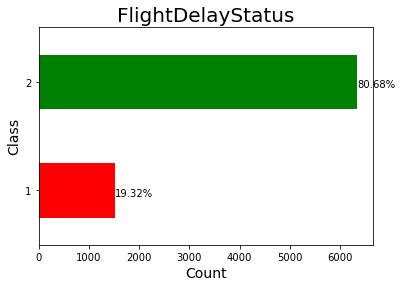

2    6342
1    1519
Name: FlightDelayStatus, dtype: int64


In [137]:
# Plotting the percentage of observations that fall under each class
ax = df["FlightDelayStatus"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("FlightDelayStatus", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(df["FlightDelayStatus"].value_counts())
fig = ax.get_figure()
fig.savefig("Img/05_01_ArrDel15_Class_Imbalance.png")

In [138]:
df.shape

(7861, 29)

In [139]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'YearMonthDay_x', 'GroundHeight', 'StationHeight',
       'BarometerHeight', 'Latitude', 'Longitude', 'TimeZone',
       'YearMonthDay_y', 'Time', 'SkyConditions', 'Visibility', 'DBT',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'HourlyPrecip',
       'FlightDelayStatus'],
      dtype='object')

In [140]:
df.WindSpeed.unique()

array([15.,  5.,  4.,  0.,  6., 16.,  8., 11., 12., 14.,  7., 17.,  9.,
        3., 13., 10., 18., 20., 21., 19., 24., 23., 22., 27., 28., 30.,
       25., 26., 33., 29.])

In [141]:
df.select_dtypes(include=['object'])


,Origin,Destination,YearMonthDay_x,YearMonthDay_y,SkyConditions,Visibility
0,BOS,CLE,2004-09-20,2004-01-01,FEW075 BKN090,10SM
1,CLE,ATL,2004-11-19,2004-01-01,BKN028 OVC033,10SM
2,SNA,LAS,2004-05-04,2004-01-01,FEW025 OVC032,9SM
3,CLT,TPA,2004-07-06,2004-01-02,SCT015 BKN020 OVC028,4SM
4,MSP,ORD,2004-09-23,2004-01-02,BKN013 OVC021,1.75SM
...,...,...,...,...,...,...
7856,IAH,DEN,2004-05-27,2004-03-28,BKN070 OVC095,10SM
7857,EWR,MEM,2004-11-29,2004-03-28,CLR,10SM
7858,IAD,GSO,2004-05-11,2004-03-28,CLR,10SM
7859,SLC,GEG,2004-01-04,2004-03-28,BKN090,10SM


In [142]:
df=df.drop(['YearMonthDay_x','YearMonthDay_y'],axis=1)

### Label encoder

In [143]:
cols = ['Origin', 'Destination', 'SkyConditions', 'Visibility']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,FlightDelayStatus
0,2004,9,20,1,1000,1154,114,27,43,563,...,630,6,32.0,40.0,15.0,160,0.0,30.05,0.0,2
1,2004,11,19,5,1440,1634,114,45,13,554,...,112,6,21.0,74.0,5.0,0,0.0,30.06,0.0,1
2,2004,5,4,2,1800,1902,62,205,115,226,...,399,16,25.0,75.0,4.0,0,0.0,30.06,0.0,2
3,2004,7,6,2,1400,1533,93,47,207,508,...,762,11,25.0,92.0,0.0,0,0.0,29.98,0.0,2
4,2004,9,23,4,830,946,76,153,155,334,...,70,5,27.0,85.0,0.0,0,0.0,29.99,0.0,2


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     7861 non-null   int64  
 1   Month                    7861 non-null   int64  
 2   DayofMonth               7861 non-null   int64  
 3   DayOfWeek                7861 non-null   int64  
 4   ScheduledDepTime         7861 non-null   int64  
 5   ScheduledArrTime         7861 non-null   int64  
 6   ScheduledTravelTime      7861 non-null   int64  
 7   Origin                   7861 non-null   int32  
 8   Destination              7861 non-null   int32  
 9   Distance                 7861 non-null   int64  
 10  GroundHeight             7861 non-null   int64  
 11  StationHeight            7861 non-null   int64  
 12  BarometerHeight          7861 non-null   int64  
 13  Latitude                 7861 non-null   float64
 14  Longitude               

In [145]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,FlightDelayStatus
count,7861.0,7861.00000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,...,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,2004.0,7.12085,15.441292,3.960946,1198.225417,1412.232922,129.623839,110.092355,102.350464,743.764025,...,336.000763,6.151507,46.462918,43.526619,6.872281,164.722046,3.979392,29.779902,0.000069,1.806768
std,0.0,2.82233,9.049019,1.980921,354.923067,369.739052,63.272072,62.433381,59.912529,522.629372,...,197.845886,1.273659,15.548792,26.128947,5.100114,116.039783,8.828625,1.156824,0.002029,0.394859
min,2004.0,1.00000,1.000000,1.000000,215.000000,553.000000,61.000000,0.000000,0.000000,69.000000,...,0.000000,0.000000,-8.000000,3.000000,0.000000,0.000000,0.000000,25.790000,0.000000,1.000000
25%,2004.0,5.00000,7.000000,2.000000,900.000000,1111.000000,83.000000,58.000000,52.000000,368.000000,...,243.000000,6.000000,36.000000,21.000000,4.000000,40.000000,0.000000,30.010000,0.000000,2.000000
50%,2004.0,7.00000,15.000000,4.000000,1215.000000,1430.000000,112.000000,116.000000,101.000000,595.000000,...,243.000000,6.000000,46.000000,38.000000,6.000000,180.000000,0.000000,30.130000,0.000000,2.000000
75%,2004.0,9.00000,23.000000,6.000000,1518.000000,1728.000000,155.000000,162.000000,155.000000,951.000000,...,243.000000,6.000000,57.000000,64.000000,9.000000,260.000000,0.000000,30.240000,0.000000,2.000000
max,2004.0,11.00000,31.000000,7.000000,1800.000000,2300.000000,562.000000,222.000000,214.000000,4962.000000,...,923.000000,16.000000,86.000000,100.000000,33.000000,360.000000,42.000000,30.590000,0.100000,2.000000


In [146]:
df1=pd.DataFrame(df)

In [147]:
df1.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'GroundHeight', 'StationHeight', 'BarometerHeight',
       'Latitude', 'Longitude', 'TimeZone', 'Time', 'SkyConditions',
       'Visibility', 'DBT', 'RelativeHumidityPercent', 'WindSpeed',
       'WindDirection', 'WindGustValue', 'StationPressure', 'HourlyPrecip',
       'FlightDelayStatus'],
      dtype='object')

### Feature preprocessing

In [148]:
# get continuous and dichotomous data
categorical = ["Year", "DayofMonth", "Month", "DayOfWeek", "WindSpeed","WindDirection","Origin", "Destination", "Time", "TimeZone","FlightDelayStatus"]
numeric = [ "ScheduledArrTime","ScheduledDepTime","DBT", "RelativeHumidityPercent", "WindGustValue", "StationPressure", "HourlyPrecip", "GroundHeight", "StationHeight", "BarometerHeight","Latitude","Longitude"]
target = df1["FlightDelayStatus"]

# pbc of first question
pbc = list()
for col in numeric:
    ans = pointbiserialr(df1[col], target)
    pbc.append([col, ans[0], ans[1]])
    
pbc_corr = pd.DataFrame(pbc, columns=["Feature", "CorrCoeff", "pValue"]).sort_values(by="CorrCoeff", ascending=False).reset_index(drop=True)
pbc_corr

,Feature,CorrCoeff,pValue
0,RelativeHumidityPercent,0.007451,5.089020e-01
1,StationPressure,0.002323,8.368277e-01
2,Longitude,-0.000932,9.341201e-01
3,Latitude,-0.001918,8.649583e-01
4,GroundHeight,-0.002032,8.570307e-01
5,BarometerHeight,-0.002032,8.570307e-01
6,StationHeight,-0.002032,8.570307e-01
7,WindGustValue,-0.003077,7.850478e-01
8,DBT,-0.016595,1.412317e-01
9,HourlyPrecip,-0.018365,1.034949e-01


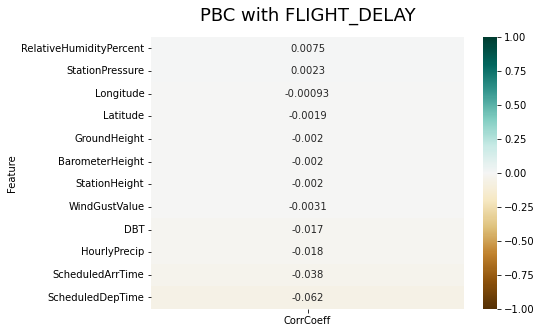

In [149]:
plt.figure(figsize=(7, 5))
pbc_corr = pbc_corr.set_index("Feature")
heatmap = sns.heatmap(pbc_corr[["CorrCoeff"]].sort_values(by="CorrCoeff", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("PBC with FLIGHT_DELAY", fontdict={"fontsize":18}, pad=16);
plt.savefig("Img/05_02_PBC_ArrDel15.png")
del pbc_corr

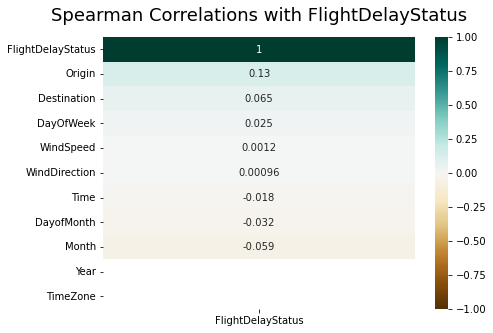

In [150]:
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(df[categorical].corr(method="spearman")[["FlightDelayStatus"]].sort_values(by="FlightDelayStatus", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Spearman Correlations with FlightDelayStatus", fontdict={"fontsize":18}, pad=16)
plt.savefig("Img/05_03_Spearman_ArrDel15.png")
del heatmap

In [151]:
X = df1.loc[:, df1.columns != "FlightDelayStatus"]
y = np.array(df1.loc[:, df1.columns == "FlightDelayStatus"]["FlightDelayStatus"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(X, y)
# joblib.dump(model, "./Data/feature_importance_model.joblib")
#model = joblib.load(".feature_importance_model.joblib")
importances = model.feature_importances_
importances

array([0.        , 0.04707203, 0.07840076, 0.04073344, 0.06900353,
       0.06932013, 0.06644611, 0.07807185, 0.06627971, 0.07096252,
       0.00229659, 0.00217708, 0.00214073, 0.00959493, 0.00935747,
       0.        , 0.06515355, 0.03222331, 0.00455966, 0.05370358,
       0.05906635, 0.0422356 , 0.04971197, 0.01554424, 0.0651499 ,
       0.00079493])

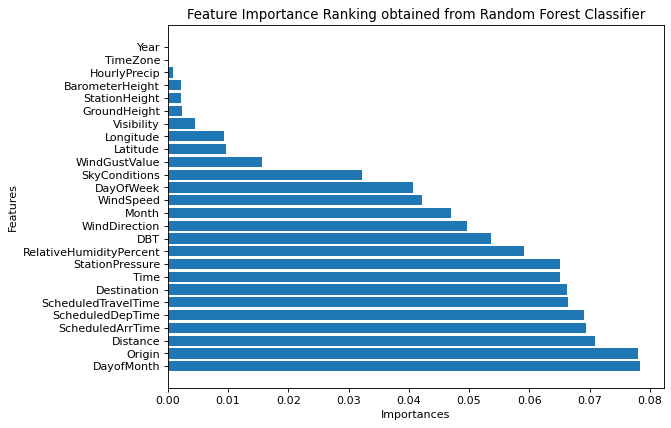

In [152]:
importances = pd.DataFrame({
    "Feature": list(X.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
plt.savefig("Img/05_04_Feature_Importances_RFC_fin.png")
del importances
del model
del X
del y

In [153]:
df1.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'GroundHeight', 'StationHeight', 'BarometerHeight',
       'Latitude', 'Longitude', 'TimeZone', 'Time', 'SkyConditions',
       'Visibility', 'DBT', 'RelativeHumidityPercent', 'WindSpeed',
       'WindDirection', 'WindGustValue', 'StationPressure', 'HourlyPrecip',
       'FlightDelayStatus'],
      dtype='object')

In [154]:
df1=df1.drop(['Year','TimeZone','HourlyPrecip','BarometerHeight','StationHeight','GroundHeight','Visibility','Latitude','Longitude',
             'WindGustValue'],axis=1)

<AxesSubplot:>

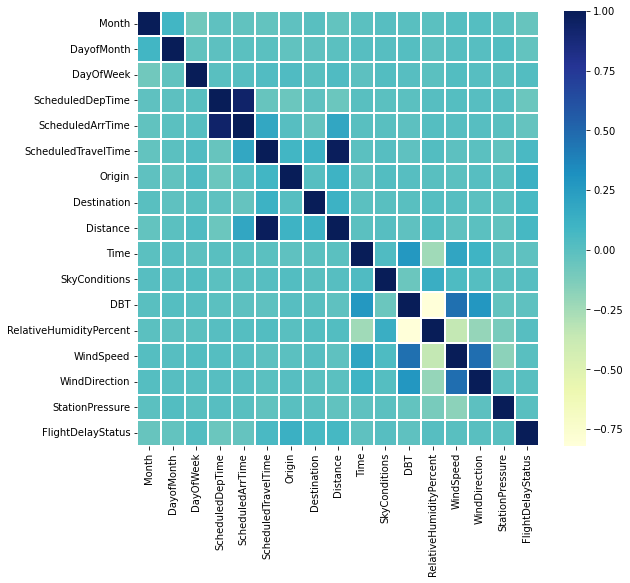

In [155]:
corrmat = df1.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)


In [156]:
X = df1.loc[:, df1.columns != "FlightDelayStatus"]
y = np.array(df1.loc[:, df1.columns == "FlightDelayStatus"]["FlightDelayStatus"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(X, y)
# joblib.dump(model, "./Data/feature_importance_model.joblib")
#model = joblib.load(".feature_importance_model.joblib")
importances = model.feature_importances_
importances

array([0.04799703, 0.08503623, 0.03955529, 0.07068239, 0.07238355,
       0.06764067, 0.08212056, 0.07119052, 0.07367455, 0.06928859,
       0.03209159, 0.05791794, 0.06235405, 0.04561001, 0.05184738,
       0.07060966])

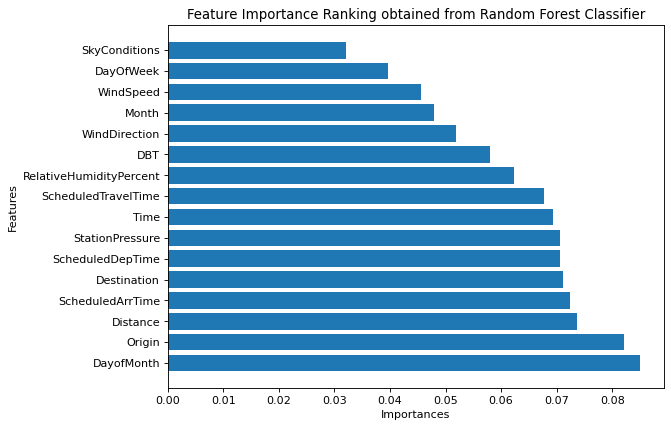

In [157]:
importances = pd.DataFrame({
    "Feature": list(X.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
plt.savefig("Img/05_04_Feature_Importances_RFC_fin.png")
del importances
del model
del X
del y

In [158]:
df1.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'Time', 'SkyConditions', 'DBT', 'RelativeHumidityPercent',
       'WindSpeed', 'WindDirection', 'StationPressure', 'FlightDelayStatus'],
      dtype='object')

In [159]:
# Encode the names of the 15 airports which are strings into a number range: 0 - 14
labelEncoder = LabelEncoder()
df1["Origin"] = labelEncoder.fit_transform(df1["Origin"])
df1["Destination"] = labelEncoder.fit_transform(df1["Destination"])
features = df1.loc[:, df1.columns != "FlightDelayStatus"]
labels = np.asarray(df1["FlightDelayStatus"])
print(features.columns)

Index(['Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'Time', 'SkyConditions', 'DBT', 'RelativeHumidityPercent',
       'WindSpeed', 'WindDirection', 'StationPressure'],
      dtype='object')


In [160]:
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {df1.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")
# print(f"{features_train.shape[1]} Features: {features_train.columns.to_list()}")
# df1.to_csv("Data/flight_and_weather_encoded.csv")


Dataset shape: (7861, 17)
features_train shape: (6288, 16) | features_test shape: (1573, 16)
labels_train shape: (6288,) | labels_test shape: (1573,)


# Random Over Sampling to Handle Imbalance

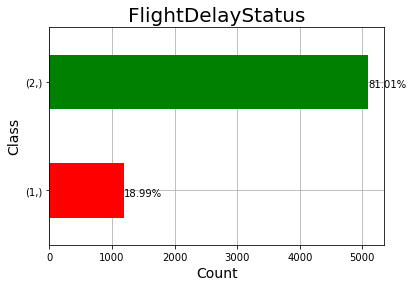

2    5094
1    1194
dtype: int64


In [161]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("FlightDelayStatus", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(labels_train).value_counts())
fig = ax.get_figure()
fig.savefig("Img/08_02_Training_ArrDel15_Class_Imbalance.png")

In [162]:
# Imbalanced dataset helpers
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
features_train, labels_train = ros.fit_resample(features_train, labels_train)

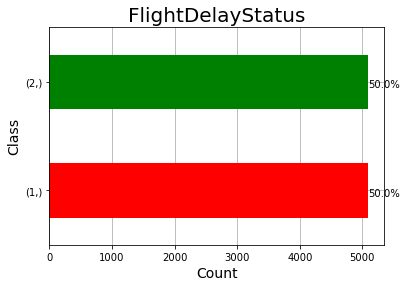

1    5094
2    5094
dtype: int64


In [163]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("FlightDelayStatus", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(labels_train).value_counts())
fig = ax.get_figure()
fig.savefig("Img/08_03_RandomOverSampling_Training_ArrDel15_Class.png")

predicted after oversampling and removing less important feature

In [164]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classi= SVC(kernel = 'rbf', random_state = 0)
classi.fit(features_train, labels_train)


SVC(random_state=0)

In [165]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score( classi, features_train,labels_train, cv = 10)

In [166]:
# Calculating the mean  and Standard Deviation of the 'Accuracy' Metric
accuracies.mean()
#accuracies.std()

0.5902962571649466

In [167]:
accuracies.std()

0.023395954074753485

### Ensemble ML algorithms

In [168]:
df1.shape

(7861, 17)

In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

def evaluate(model, features_train, features_test, labels_train, labels_test):
    labels_test_pred = model.predict(features_test)
    labels_train_pred = model.predict(features_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(labels_train, labels_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(labels_train, labels_train_pred)}")   
    print(f"ACCURACY SCORE:\n{accuracy_score(labels_train, labels_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    
    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(labels_test, labels_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(labels_test, labels_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(labels_test, labels_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    


### Bagging classifier

In [170]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=400, random_state=42)
bagging_clf.fit(features_train, labels_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = bagging_clf, X = features_train, y = labels_train, cv = 10)
accuracies.mean()
accuracies.std()

evaluate(bagging_clf, features_train, features_test, labels_train, labels_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5094    0]
 [   0 5094]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                1       2  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    5094.0  5094.0       1.0    10188.0       10188.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[  71  254]
 [  69 1179]]
ACCURACY SCORE:
0.7947
CLASSIFICATION REPORT:
                    1            2  accuracy    macro avg  weighted avg
precision    0.507143     0.822749   0.79466     0.664946      0.757541
recall       0.218462     0.944712   0.79466     0.581587      0.794660
f1-score     0.305376     0.879523   0.79466     0.592449      0.760897
support    325.000000  1248.000000   0.79466  1573.000000   1573.000000


In [171]:
accuracies.mean()


0.9638793184889843

In [172]:
accuracies.std()


0.008347283211336428

In [173]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(labels_train, bagging_clf.predict(features_train)),
        'Test': accuracy_score(labels_test, bagging_clf.predict(features_test)),
    },
}

### RandomForest classifier

In [174]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)
rf_clf.fit(features_train, labels_train)
evaluate(rf_clf, features_train, features_test, labels_train, labels_test)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = rf_clf, X = features_train, y = labels_train, cv = 10)
print('mean=accuracies1.mean()')
print('std=accuracies1.std()')

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5094    0]
 [   0 5094]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                1       2  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    5094.0  5094.0       1.0    10188.0       10188.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[  45  280]
 [  36 1212]]
ACCURACY SCORE:
0.7991
CLASSIFICATION REPORT:
                    1            2  accuracy    macro avg  weighted avg
precision    0.555556     0.812332   0.79911     0.683944      0.759279
recall       0.138462     0.971154   0.79911     0.554808      0.799110
f1-score     0.221675     0.884672   0.79911     0.553173      0.747689
support    325.000000  1248.000000   0.79911  1573.000000   1573.000000
mean=accuracies1.mean()
std=accuracies1.std()


In [175]:
accuracies1.mean()

0.9789952590370389

In [176]:
accuracies1.std()

0.007449610089597441

In [177]:
scores['Random Forest'] = {
        'Train': accuracy_score(labels_train, rf_clf.predict(features_train)),
        'Test': accuracy_score(labels_test, rf_clf.predict(features_test)),
    }

### ExtraTrees Classifier

In [178]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(features_train, labels_train)
evaluate(ex_tree_clf,features_train, features_test, labels_train, labels_test)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = ex_tree_clf, X = features_train, y = labels_train, cv = 10)
accuracy.mean()
accuracy.std()

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5094    0]
 [   0 5094]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                1       2  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    5094.0  5094.0       1.0    10188.0       10188.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[  29  296]
 [  11 1237]]
ACCURACY SCORE:
0.8048
CLASSIFICATION REPORT:
                    1            2  accuracy    macro avg  weighted avg
precision    0.725000     0.806915  0.804832     0.765957      0.789990
recall       0.089231     0.991186  0.804832     0.540208      0.804832
f1-score     0.158904     0.889608  0.804832     0.524256      0.738636
support    325.000000  1248.000000  0.804832  1573.000000   1573.000000


0.01002710473934203

In [179]:
accuracy.mean()

0.9889093471584107

In [180]:
accuracy.std()

0.01002710473934203

In [181]:
scores['Extra Tree'] = {
        'Train': accuracy_score(labels_train, ex_tree_clf.predict(features_train)),
        'Test': accuracy_score(labels_test, ex_tree_clf.predict(features_test)),
    }

### Boosting Algorithms

In [182]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=830)
ada_boost_clf.fit(features_train, labels_train)
evaluate(ada_boost_clf, features_train, features_test, labels_train, labels_test)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = ada_boost_clf, X = features_train, y = labels_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3848 1246]
 [1319 3775]]
ACCURACY SCORE:
0.7482
CLASSIFICATION REPORT:
                     1            2  accuracy     macro avg  weighted avg
precision     0.744726     0.751842  0.748233      0.748284      0.748284
recall        0.755399     0.741068  0.748233      0.748233      0.748233
f1-score      0.750024     0.746416  0.748233      0.748220      0.748220
support    5094.000000  5094.000000  0.748233  10188.000000  10188.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[181 144]
 [344 904]]
ACCURACY SCORE:
0.6898
CLASSIFICATION REPORT:
                    1            2  accuracy    macro avg  weighted avg
precision    0.344762     0.862595  0.689765     0.603679      0.755605
recall       0.556923     0.724359  0.689765     0.640641      0.689765
f1-score     0.425882     0.787456  0.689765     0.606669      0.712751
support    325.000000  1248.000000  0.689765  1573.000000   1573.000000


In [183]:
mean=accuracies1.mean()
mean

0.7157413851940826

In [184]:
std=accuracies1.std()
std

0.010681160592131075

In [185]:
scores['AdaBoost'] = {
        'Train': accuracy_score(labels_train, ada_boost_clf.predict(features_train)),
        'Test': accuracy_score(labels_test, ada_boost_clf.predict(features_test)),
    }

### Gradient Boosting Classifier

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(features_train, labels_train)
evaluate(grad_boost_clf,features_train, features_test, labels_train, labels_test)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = grad_boost_clf, X = features_train, y = labels_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3799 1295]
 [1374 3720]]
ACCURACY SCORE:
0.7380
CLASSIFICATION REPORT:
                     1            2  accuracy     macro avg  weighted avg
precision     0.734390     0.741775  0.738025      0.738082      0.738082
recall        0.745779     0.730271  0.738025      0.738025      0.738025
f1-score      0.740041     0.735978  0.738025      0.738009      0.738009
support    5094.000000  5094.000000  0.738025  10188.000000  10188.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[198 127]
 [342 906]]
ACCURACY SCORE:
0.7018
CLASSIFICATION REPORT:
                    1            2  accuracy    macro avg  weighted avg
precision    0.366667     0.877057  0.701844     0.621862      0.771605
recall       0.609231     0.725962  0.701844     0.667596      0.701844
f1-score     0.457803     0.794388  0.701844     0.626096      0.724846
support    325.000000  1248.000000  0.701844  1573.000000   1573.000000


In [187]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(labels_train, grad_boost_clf.predict(features_train)),
        'Test': accuracy_score(labels_test, grad_boost_clf.predict(features_test)),
    }

### Voting classifier

In [188]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

estimators = []
tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

rf = RandomForestClassifier()
estimators.append(('RF', rf))

gnb = GaussianNB()
estimators.append(('GNB', rf))

ab=AdaBoostClassifier(n_estimators=40)
estimators.append(('AB', ab))

xgb=xgb.XGBClassifier()
estimators.append(('xgb', xgb))

voting = VotingClassifier(estimators=estimators)
voting.fit(features_train, labels_train)

from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = voting, X = features_train, y = labels_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()
evaluate(voting,features_train, features_test, labels_train, labels_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5094    0]
 [   0 5094]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                1       2  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    5094.0  5094.0       1.0    10188.0       10188.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[  76  249]
 [  82 1166]]
ACCURACY SCORE:
0.7896
CLASSIFICATION REPORT:
                    1            2  accuracy    macro avg  weighted avg
precision    0.481013     0.824028  0.789574     0.652520      0.753157
recall       0.233846     0.934295  0.789574     0.584071      0.789574
f1-score     0.314700     0.875704  0.789574     0.595202      0.759794
support    325.000000  1248.000000  0.789574  1573.000000   1573.000000


In [189]:
scores['Voting'] = {
        'Train': accuracy_score(labels_train, voting.predict(features_train)),
        'Test': accuracy_score(labels_test, voting.predict(features_test)),
    }

<AxesSubplot:>

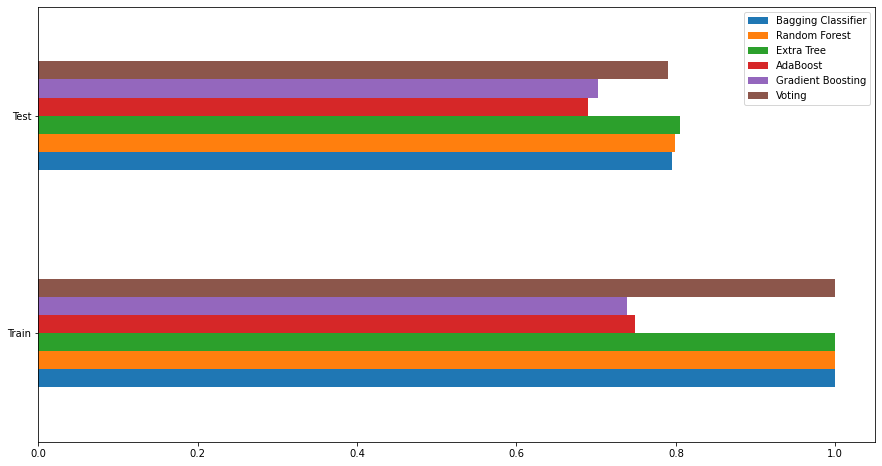

In [190]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

In [191]:
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7946598855689765},
 'Random Forest': {'Train': 1.0, 'Test': 0.7991099809281628},
 'Extra Tree': {'Train': 1.0, 'Test': 0.8048315321042594},
 'AdaBoost': {'Train': 0.7482332155477032, 'Test': 0.6897647806738716},
 'Gradient Boosting': {'Train': 0.7380251276010993,
  'Test': 0.7018436109345201},
 'Voting': {'Train': 1.0, 'Test': 0.789574062301335}}

#### Adaboost and Gradient boost classifier has good accuracy wrt train and test data

In [192]:
model=ada_boost_clf

In [193]:
model

AdaBoostClassifier(n_estimators=830)

In [194]:
test_data=pd.read_csv('test_data_comp.csv')

In [195]:
test_data.columns

Index(['Unnamed: 0', 'FlightNumber', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'ScheduledDepTime', 'ScheduledArrTime',
       'ScheduledTravelTime', 'Origin', 'Destination', 'Distance',
       'GroundHeight', 'StationHeight', 'BarometerHeight', 'Latitude',
       'Longitude', 'TimeZone', 'Time', 'SkyConditions', 'Visibility', 'DBT',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'HourlyPrecip'],
      dtype='object')

In [196]:
testdata1=test_data.drop(['FlightNumber'],axis=1)

In [197]:
testdata1=testdata1.drop(['Unnamed: 0','Year','TimeZone','HourlyPrecip','BarometerHeight','StationHeight','GroundHeight','Visibility','Latitude','Longitude',
             'WindGustValue'],axis=1)

### Model prediction using Adaboost model

In [198]:
FlightDelayStatus=model.predict(testdata1)

In [199]:
FlightDelayStatus

array([2, 1, 2, ..., 2, 2, 1], dtype=int64)

In [200]:
def unique(FlightDelayStatus):
    x = np.array(FlightDelayStatus)
    print(np.unique(x))
unique(FlightDelayStatus)

[1 2]


In [201]:
final1= pd.DataFrame({'FlightNumber': test_data['FlightNumber'], 'FlightDelayStatus': FlightDelayStatus})

In [202]:
final1.to_csv('Vidyashree_v_adab.csv',index=False)

### Predicted model using Gradient Boost Classifier

In [203]:
modelgb=grad_boost_clf

In [204]:
FlightDelayStatus=modelgb.predict(testdata1)

In [205]:
final2= pd.DataFrame({'FlightNumber': test_data['FlightNumber'], 'FlightDelayStatus': FlightDelayStatus})

In [206]:
final1.to_csv('Vidyashree_gb.csv',index=False)